# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Thimo Levels| 2003312|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [9]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer,max_offer+0.1,0.1)


Bij deze vraag heb ik hetzelfde gedaan als bij assignment van week 5. Ik heb aangegeven wat het minimum offer is, wat het maximale offer is en daarnaast ook de stapgrootte aangegeven. Tenslotte heb ik met np.arange een list gemaakt.

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [10]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept
 
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

Bij deze vraag heb ik het gekopieerd en geplakt vanuit de assignment van week 5, omdat we daar precies hetzelfde gedaan hebben.

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [11]:
delta = 0.9
offer = {}

Ik heb dezelfde delta genomen als bij de assignment van week 5 en daarna bij offer hetzelfde gedaan. 

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [12]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer

Bij deze vraag heb ik gekeken naar assignment van week 5 voor de opbouw van offer. Dat wat als eerste tussen de vierkante haken staat is de outside option. n-i is de ronde waar we nu in zitten en de volgende ronde is de outside option, daarom heb ik daar n-i+1 ingevuld. Dat was als tweede tussen haken staat is hetzelfde als in de assignment van week 5. 

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [13]:
delta = 0.9
print(outcome(3,0.9))

{4: [0, 0, 0], 3: (0.0, 10.0, 0.0), 2: (9.0, 1.0, 9.0), 1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002)}


In [14]:
delta = 0.9
print(outcome(2,0.9))

{4: [0, 0, 0], 3: [0, 0, 0], 2: (0.0, 10.0, 0.0), 1: (9.0, 1.0, 9.0)}


In [15]:
delta = 0.9
print(outcome(1,0.9))

{4: [0, 0, 0], 3: [0, 0, 0], 2: [0, 0, 0], 1: (0.0, 10.0, 0.0)}


De antwoorden komen overeen met de antwoorden die ik eerder gezien heb. 

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

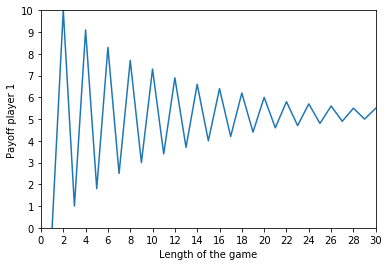

In [20]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)
payoff1 = [outcome(n,delta)[1][1] for n in range(30)]
plt.xlim(0,30)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.xlabel("Length of the game")
plt.ylim(0.0,10.0)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel("Payoff player 1")
plt.plot(range_n, payoff1)



**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

De grafiek wordt steeds smaller en gaat langzaam naar een rechte lijn. Ik denk dat hoe langer het spel duurt hoe dichter de spelers bij een eerlijke verdeling komen, dus 5 voor speler 1 en 5 voor speler 2.